Original code from 
https://github.com/aloctavodia/Doing_bayesian_data_analysis/blob/master/IPython/Kruschkes_Doing_Bayesian_Data_Analysis_in_PyMC3.ipynb

or 
https://github.com/aloctavodia/Doing_bayesian_data_analysis


In [44]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

import sys
#from StringIO import StringIO

from scipy.stats import norm, multivariate_normal, beta, binom, stats
from scipy.stats import t as stats_t
from scipy.special import beta as beta_func
from scipy.special import binom as special_binom
from scipy.special import betaln as special_betaln
from scipy.optimize import fmin
from scipy.interpolate import spline
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


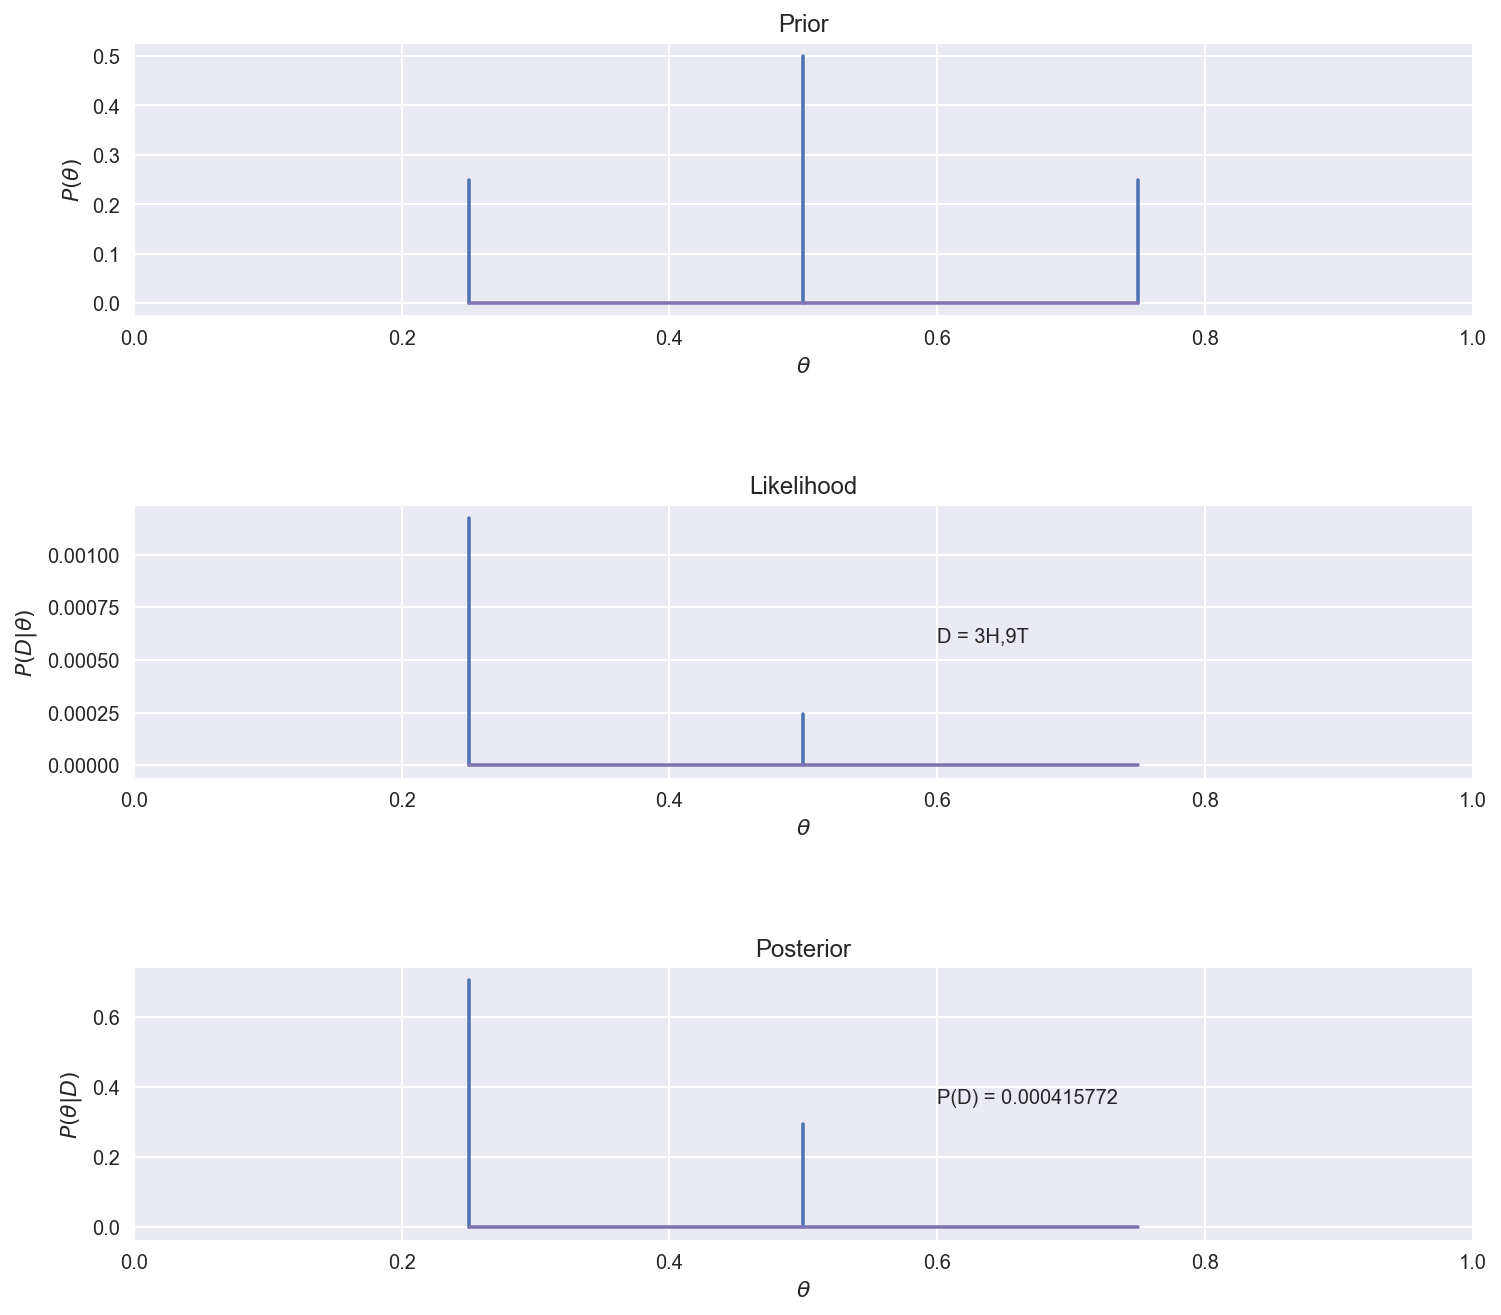

In [45]:
"""
04_BayesUpdate.py
Bayesian updating of beliefs about the bias of a coin. The prior and posterior
distributions indicate probability masses at discrete candidate values of theta.
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 3.
# Now make the vector of theta values:
theta = np.linspace(1/(n_theta_vals +1), n_theta_vals /(n_theta_vals +1), n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Bernoulli: p^k*(1-p)^(n-k) Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


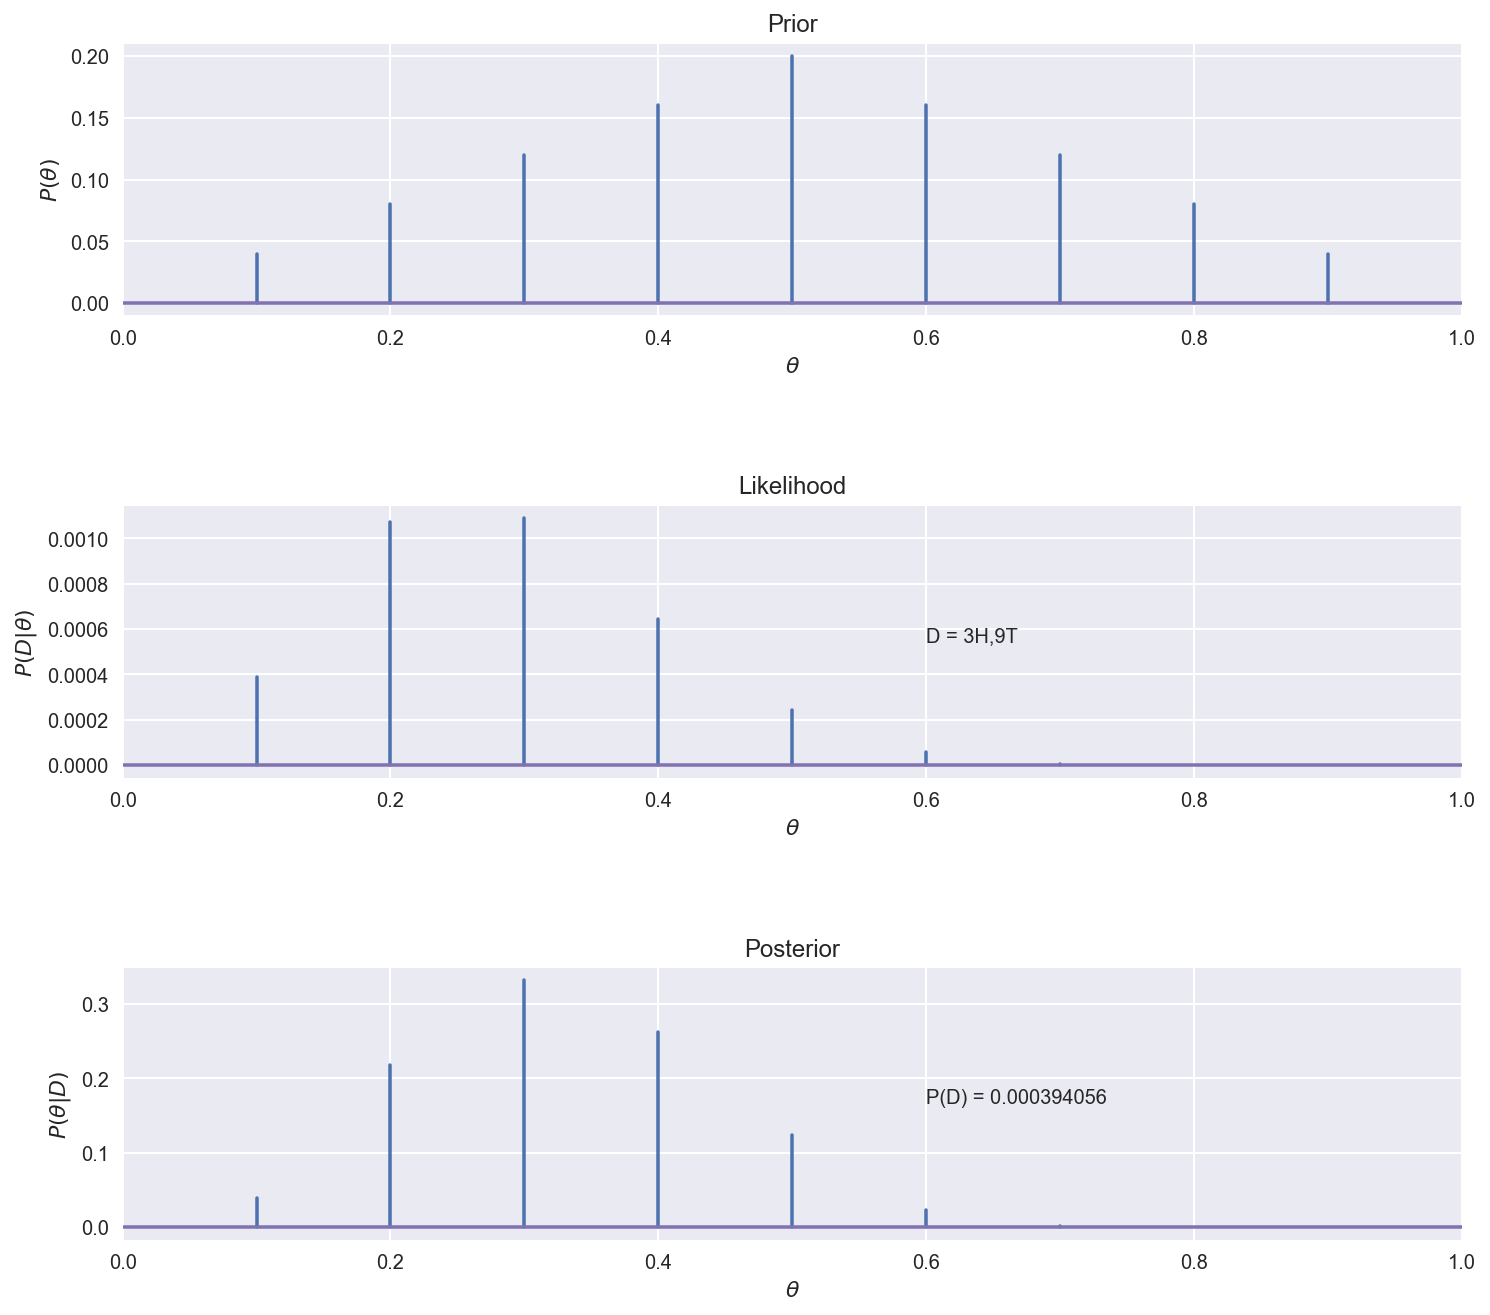

In [46]:
"""
04_BayesUpdate.py
Bayesian updating of beliefs about the bias of a coin. The prior and posterior
distributions indicate probability masses at discrete candidate values of theta.
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 11.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()

In [47]:
3/9

0.3333333333333333

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


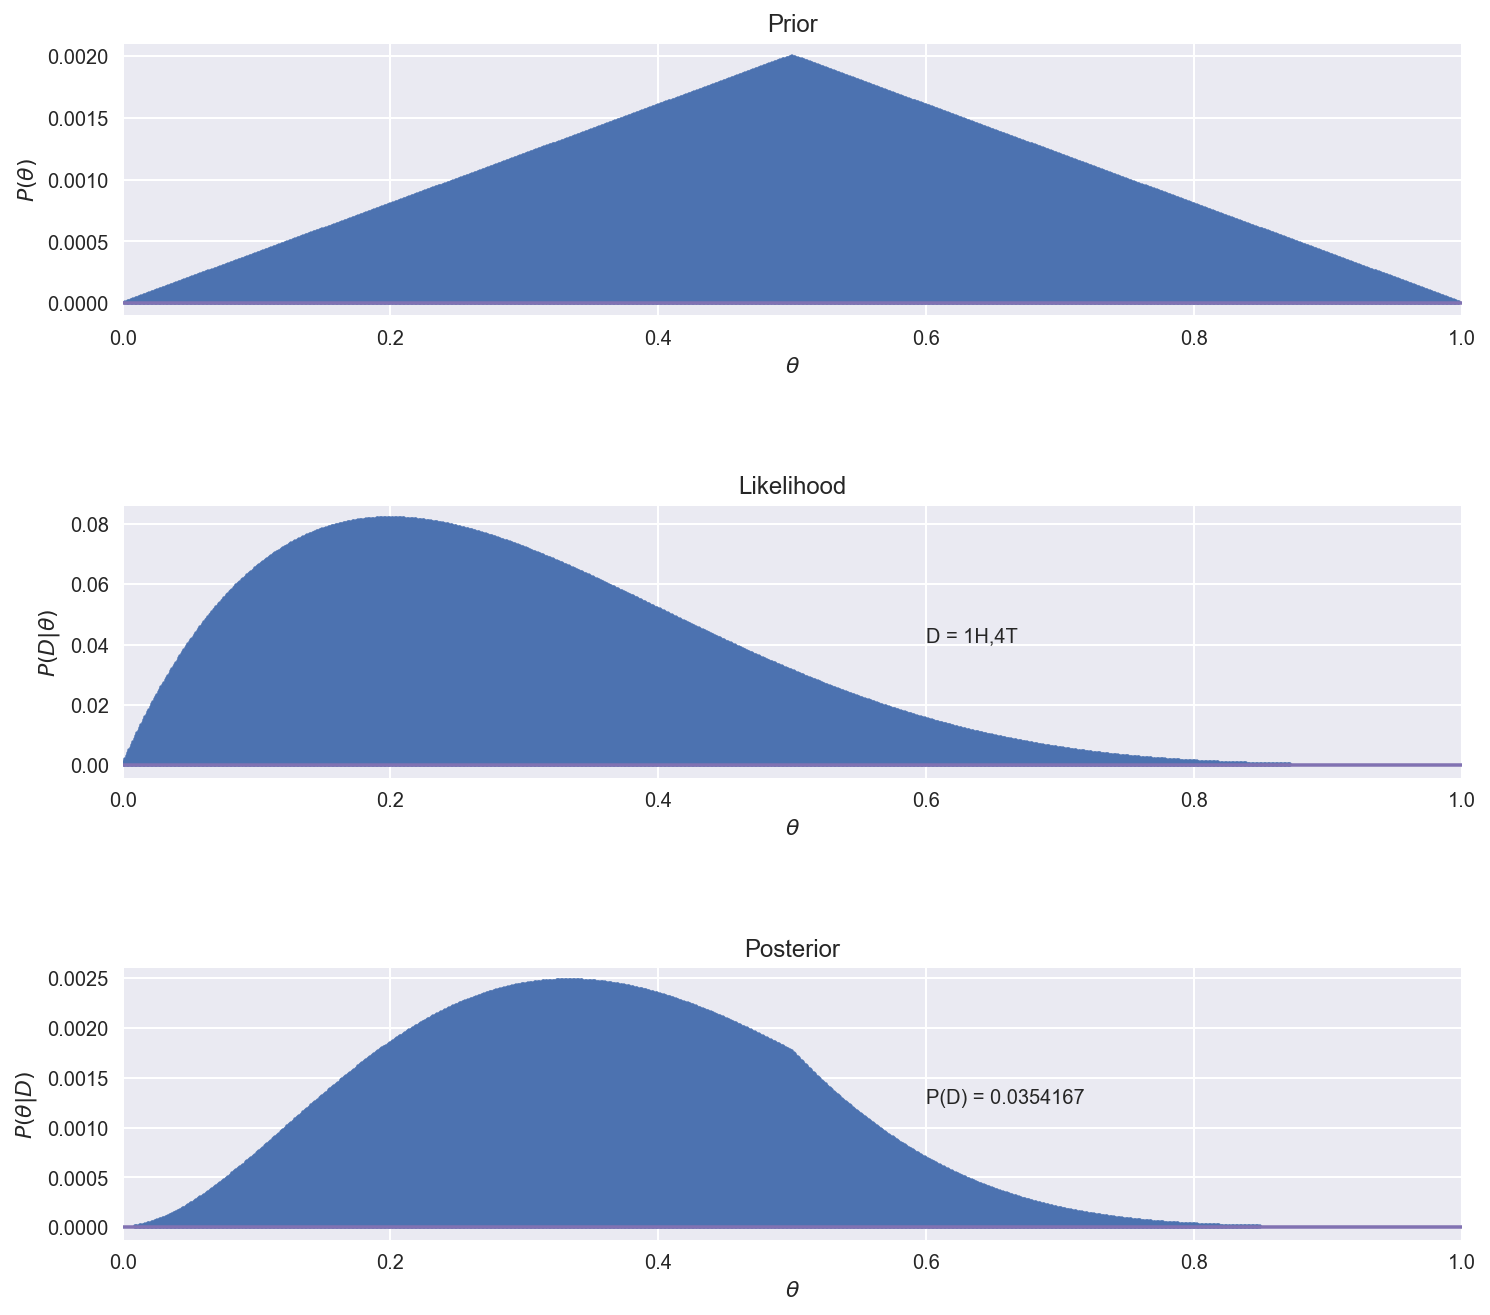

In [48]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of sample size on the posterior
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [1, 4])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


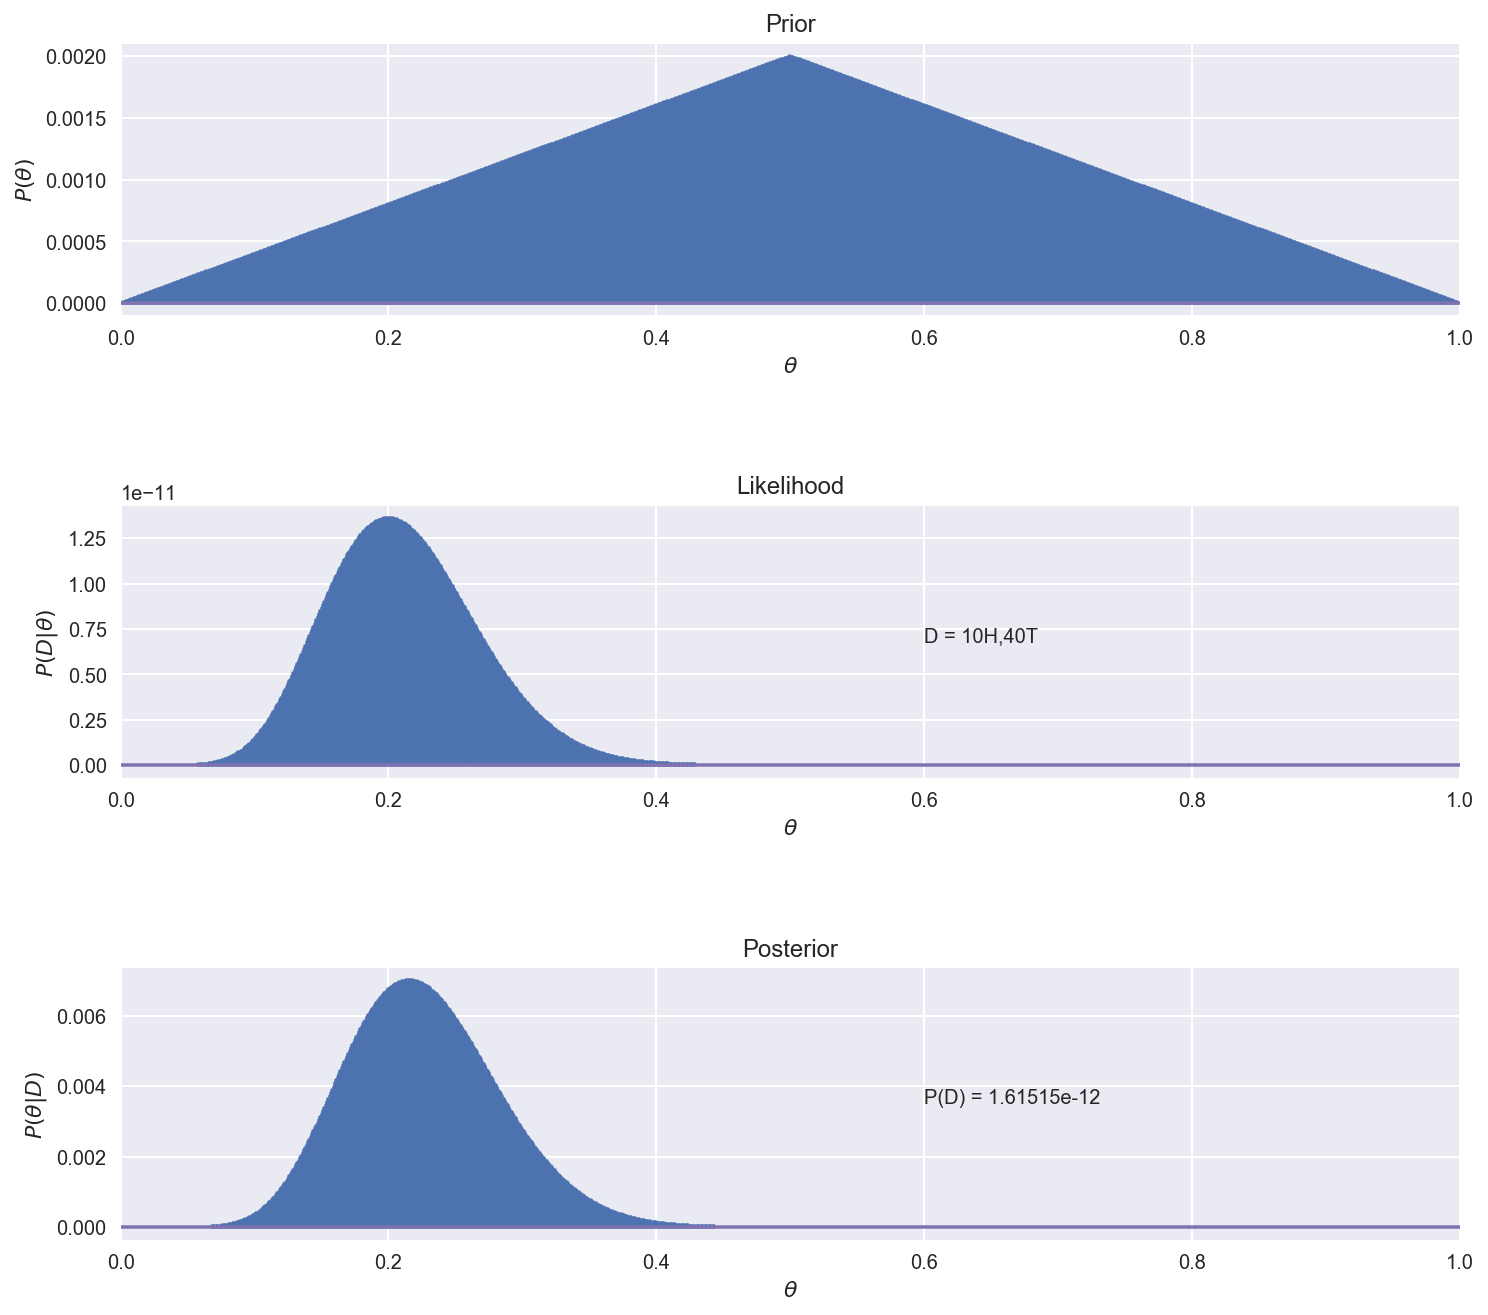

In [49]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of sample size on the posterior
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [10, 40])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


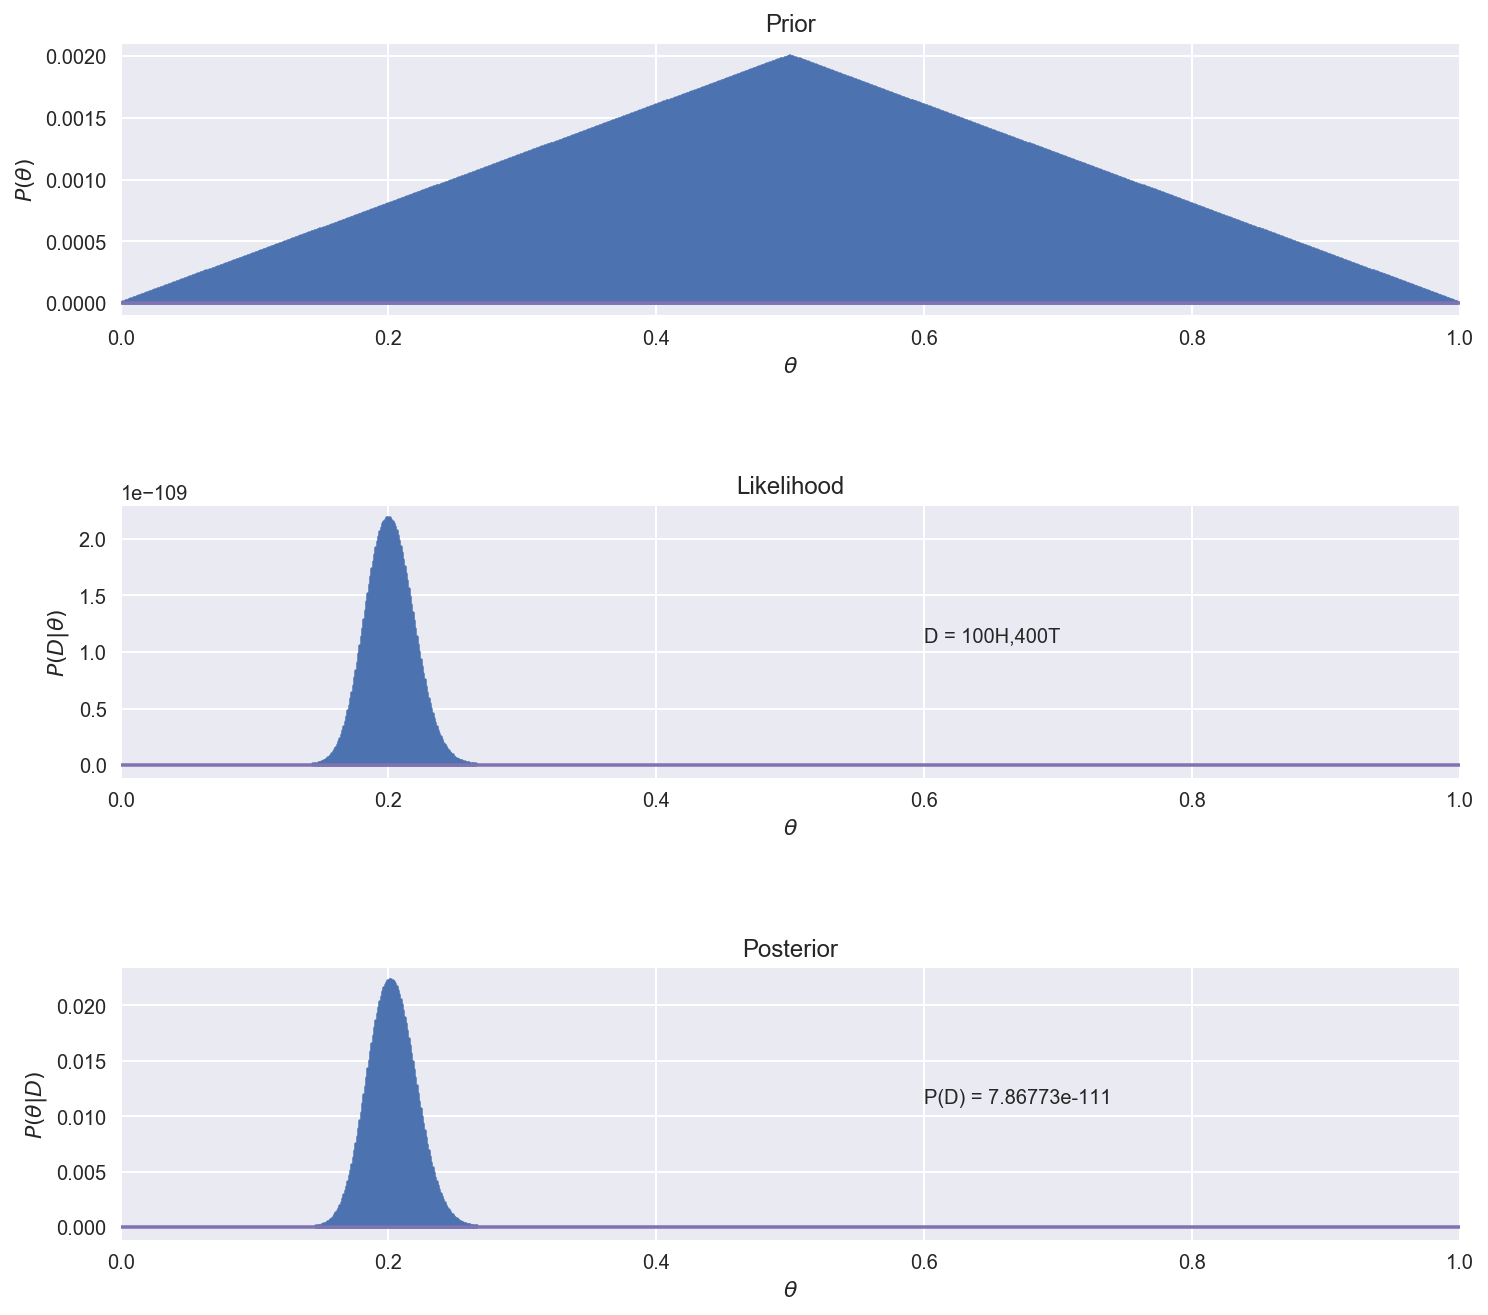

In [50]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of sample size on the posterior
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [100, 400])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()


it is visible how the sample size '$dilutes$' the prior

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


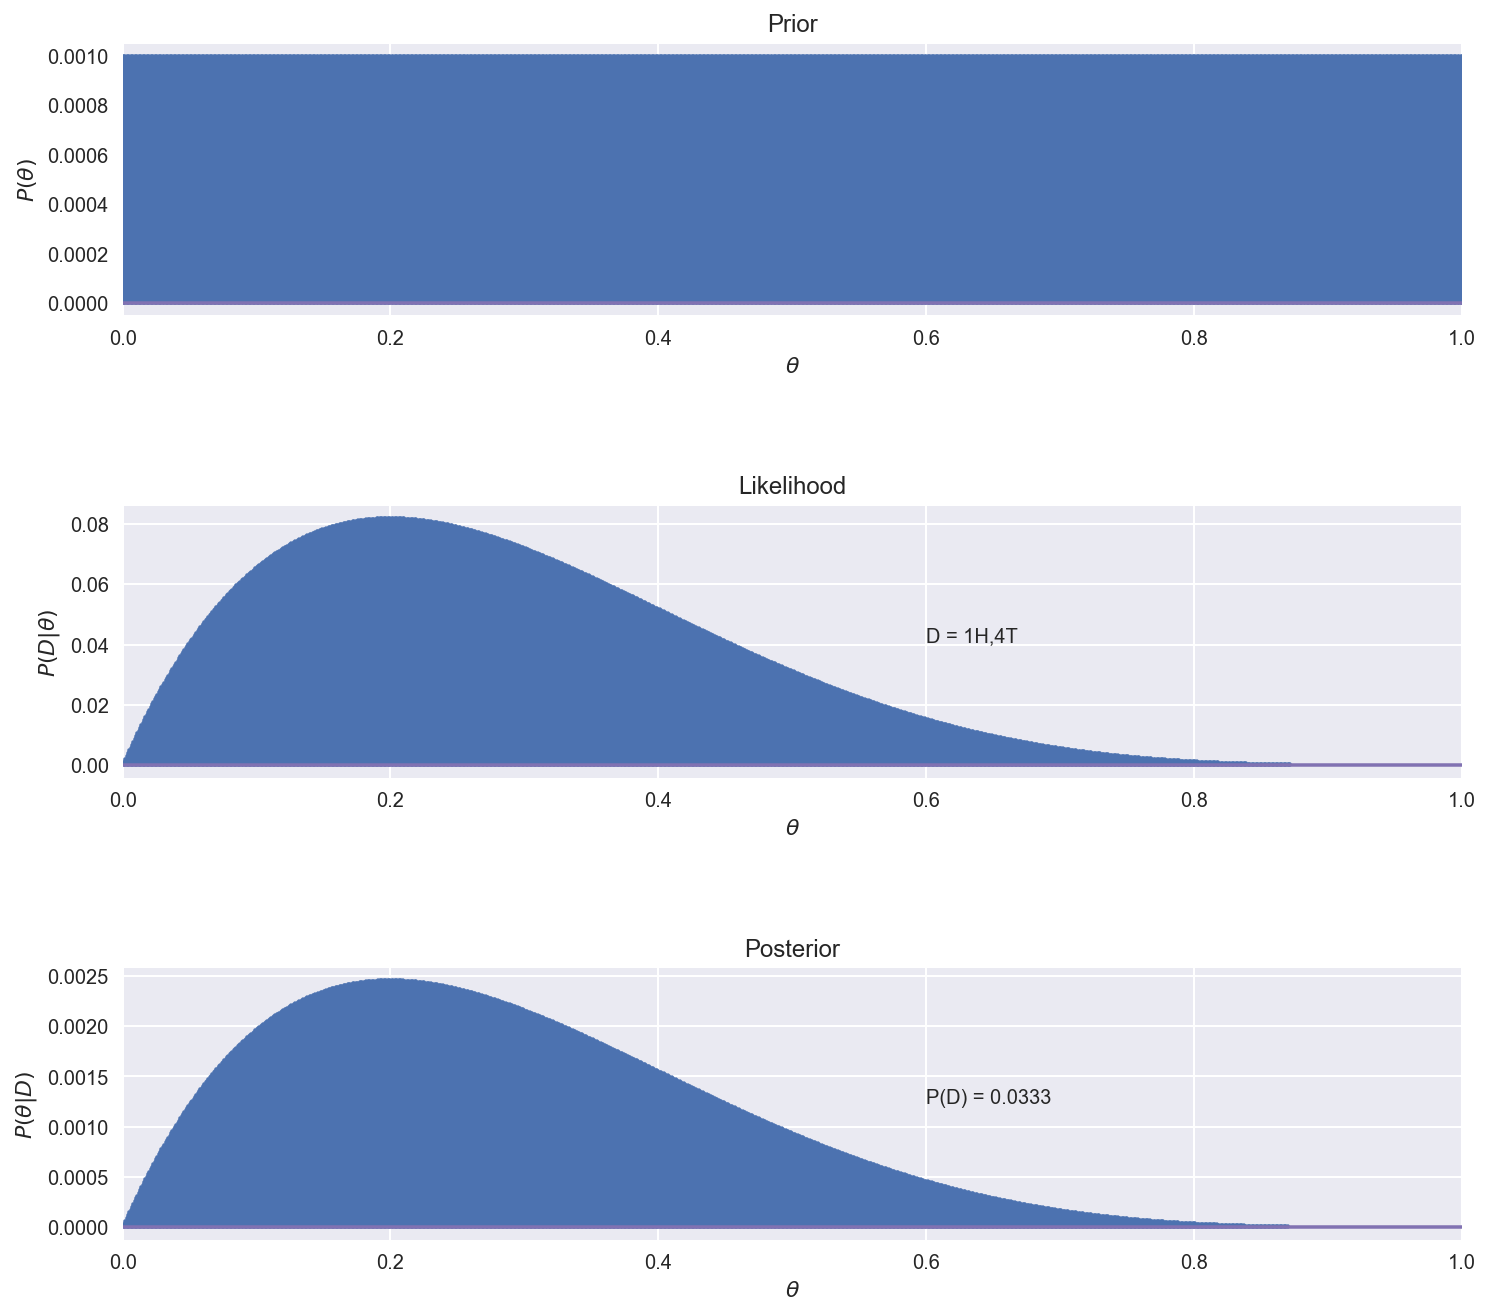

In [125]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of the prior
A prior without information will yield a posterior equal to the likelihood function
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.repeat(1/n_theta_vals, n_theta_vals)  # Makes a flat belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [1, 4])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


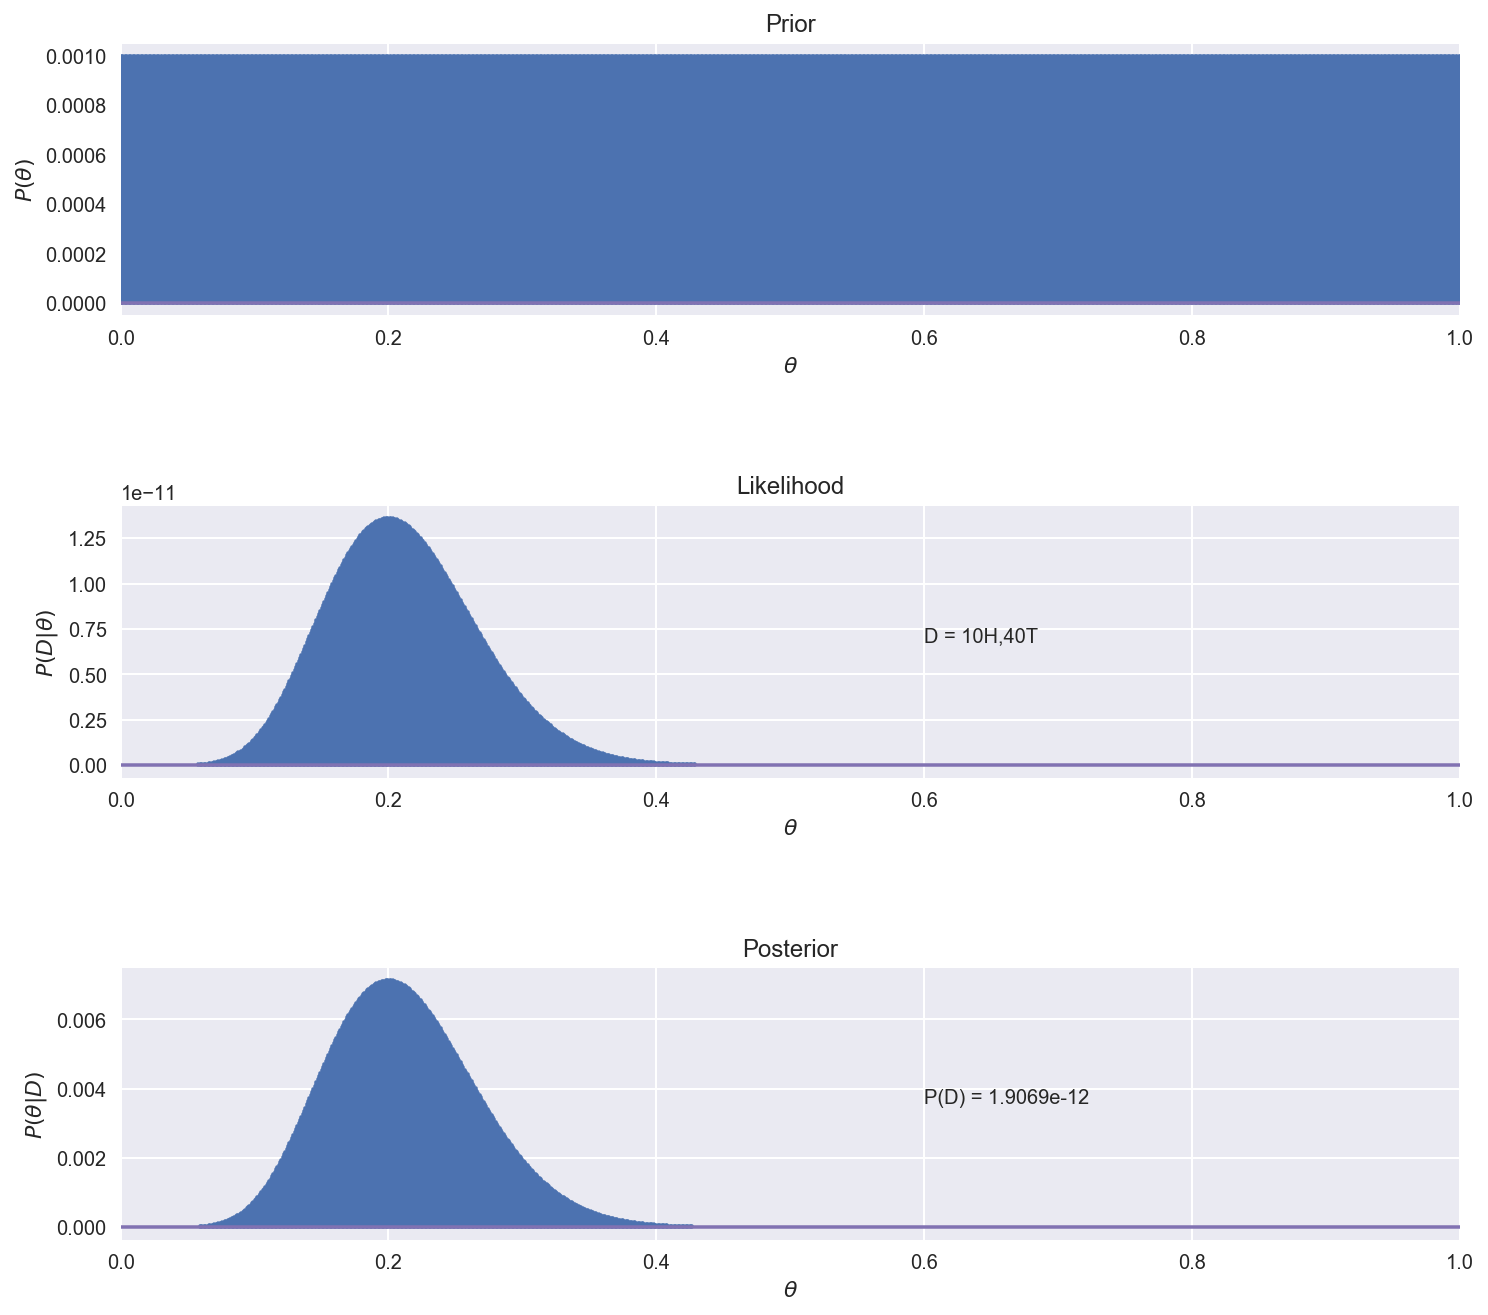

In [126]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of the prior
A prior without information will yield a posterior equal to the likelihood function
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.repeat(1/n_theta_vals, n_theta_vals)  # Makes a flat belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [10, 40])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


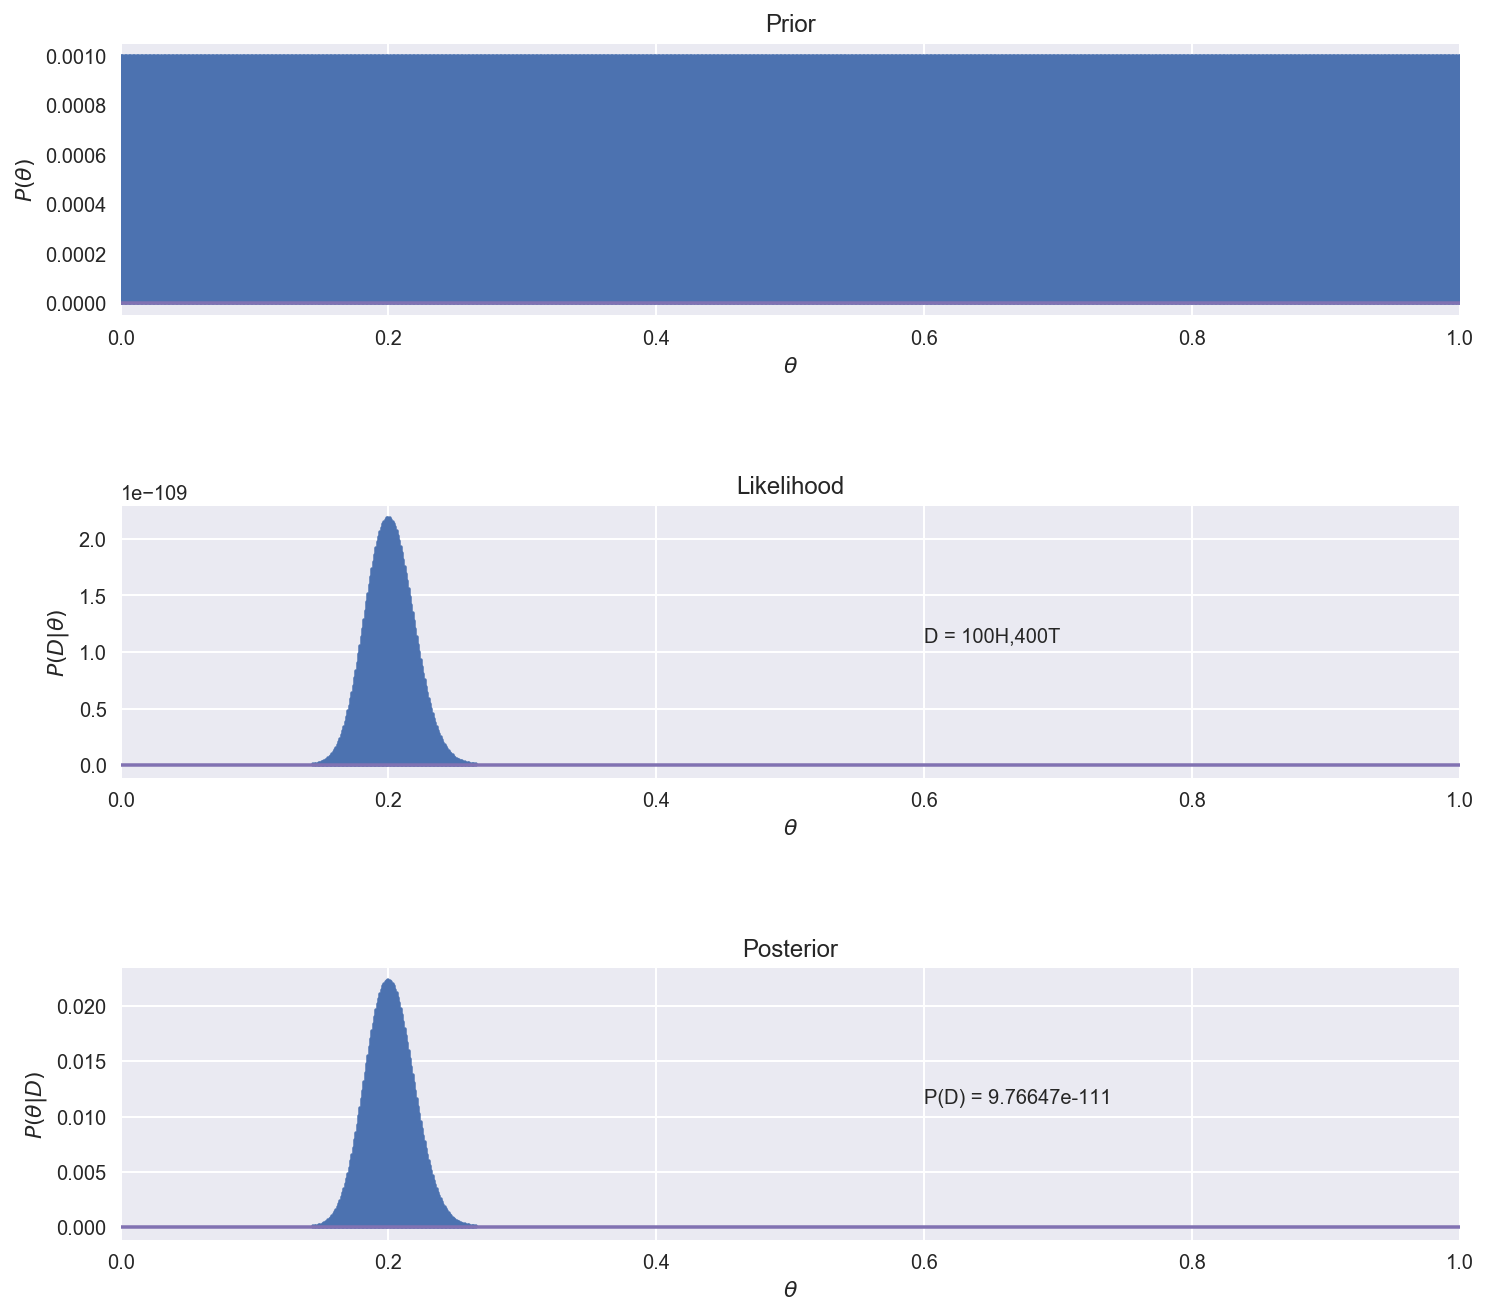

In [127]:
"""
04_BayesUpdate.py
Modified by Rodolfo to show the impact of the prior
A prior without information will yield a posterior equal to the likelihood function
"""

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001.
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals )

# p_theta is the vector of prior probabilities on the theta values.
p_theta = np.repeat(1/n_theta_vals, n_theta_vals)  # Makes a flat belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
############################################################################
data = np.repeat([1, 0], [100, 400])  #this is where I indicate the sample size
############################################################################
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(12, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
plt.stem(theta, p_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title('Prior')
# Plot the likelihood:
plt.subplot(3, 1, 2)
plt.stem(theta, p_data_given_theta, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title('Likelihood')
plt.text(0.6, np.max(p_data_given_theta)/2, 'D = %sH,%sT' % (n_heads, n_tails))
# Plot the posterior:
plt.subplot(3, 1, 3)
plt.stem(theta, p_theta_given_data, markerfmt=' ')
plt.xlim(0, 1)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title('Posterior')
_ = plt.text(0.6, np.max(p_theta_given_data)/2, 'P(D) = %g' % p_data)
plt.show()


Given a strong prior, it takes big data sample for the posterior to change. 


However, a prior without information will produce a posterior with the same shape as the likelihood function.